In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.loadtxt('HW01_data.txt', skiprows=1)[:,0]
y = np.loadtxt('HW01_data.txt', skiprows=1)[:,1]

Interval 0 is y=2.0x+-1.0
Interval 1 is y=2.0x+-1.0
Interval 2 is y=2.0x+-1.0
Interval 3 is y=0.0x+3.0
Interval 4 is y=-4.0x+15.0
Interval 5 is y=2.0x+-6.0
Interval 6 is y=-2.0x+14.0
Interval 7 is y=-1.0x+8.0
Interval 8 is y=0.0x+1.0


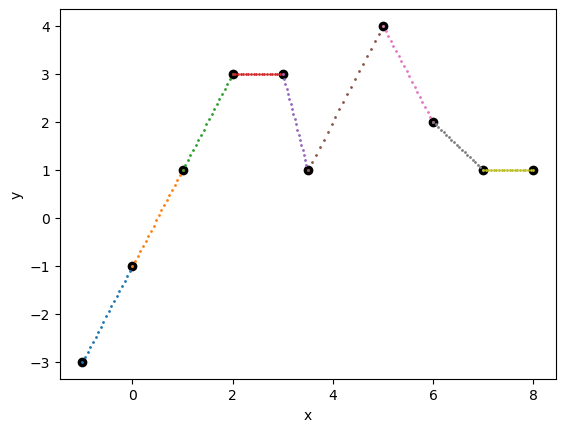

In [3]:
plt.scatter(x,y, color='black')
plt.xlabel('x')
plt.ylabel('y')

#Set the desired resolution
res = 20

#Initialize arrays to store slope (beta) and intercept (beta_0) values between points
beta = np.zeros(len(x)-1)
beta_0 = np.zeros(len(x)-1)

#Initialize arrays to store (res) predictions between each pair of data points
x_pred=[]
y_pred=[]

#Consider each interpolated function between data pairs separately
for i in range(len(beta)):
    beta[i] = (y[i+1]-y[i]) / (x[i+1]-x[i])
    beta_0[i] = y[i] - beta[i]*x[i]

    #Create (res) points evenly spaced between a data pair
    x_i = np.linspace(x[i],x[i+1], res)

    #Use interpolated functions to predict y values at each point
    y_i = x_i * beta[i] + beta_0[i]

    #Store predicted values, plot as a segment
    x_pred.extend(x_i)
    y_pred.extend(y_i)
    plt.scatter(x_i, y_i, s=1) 

    print(f'Interval {i} is y={beta[i]:.1f}x+{beta_0[i]:.1f}')

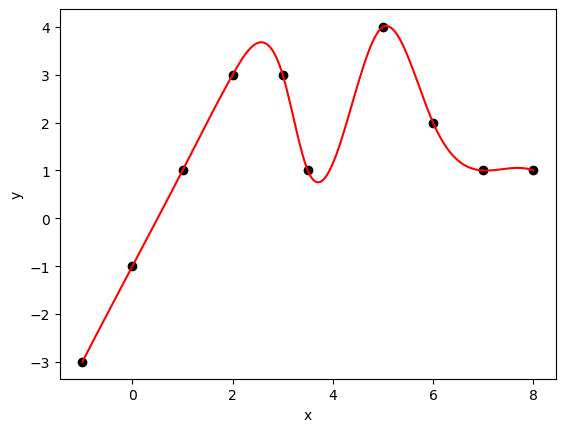

In [4]:
from scipy.interpolate import CubicSpline

plt.scatter(x,y, color='black')
plt.xlabel('x')
plt.ylabel('y')

CS = CubicSpline(x, y)
x_cs = np.linspace(np.min(x), np.max(x), len(x)*res)
y_cs = CS(x_cs)

plt.plot(x_cs,y_cs, color='red')